# A 9-hour Python tutorial focusing on data processing

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

## 6. pandas:  Series

[pandas](https://pandas.pydata.org/) is a library for data processing and data analysis on Python.

Check the official [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) and a simple version [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) for more information.


Use 
```Python
import pandas as pd
```
to import pandas.

Quite often, you will also 
```Python
import numpy as np
```
since occassionally you will need NumPy to create arrays for pandas.

In [1]:
import numpy as np
import pandas as pd

pandas provides two data structures: `Series` and `DataFrame`.  
They are similar to one-dimensional and two-dimensional `ndarray`s.

Indeed, you can create a `Series` by a one-dimensional `ndarray`.

In [2]:
data = np.random.randn(10)
data

array([ 0.39727488, -0.66107834, -0.19178459, -0.295866  , -1.68642394,
       -1.70921941, -1.23784178,  0.17710715, -0.08600932,  0.61366695])

In [3]:
s = pd.Series(data)
s

0    0.397275
1   -0.661078
2   -0.191785
3   -0.295866
4   -1.686424
5   -1.709219
6   -1.237842
7    0.177107
8   -0.086009
9    0.613667
dtype: float64

In [4]:
type(s)

pandas.core.series.Series

and create a `DataFrame` by a two-dimensional `ndarray`.

In [5]:
data = np.random.randn(2,3)
data

array([[ 1.60716357, -0.99969079, -0.00494328],
       [-1.52437645,  0.01320443,  0.10077273]])

In [6]:
df = pd.DataFrame(data)
df

,0,1,2
0,1.607164,-0.999691,-0.004943
1,-1.524376,0.013204,0.100773


In [7]:
type(df)

pandas.core.frame.DataFrame

### Operations
Similar to `ndarray`, operations on `Series` or `DataFrame` are mostly entrywise.

In [8]:
s = pd.Series(np.arange(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [9]:
s * 100

0      0
1    100
2    200
3    300
4    400
dtype: int64

In [10]:
s > 2

0    False
1    False
2    False
3     True
4     True
dtype: bool

Statistic functions are also available.

In [11]:
df = pd.DataFrame(np.arange(6).reshape(2,3))
df

,0,1,2
0,0,1,2
1,3,4,5


In [12]:
df.sum(axis=1)

0     3
1    12
dtype: int64

In [13]:
df.max(axis=0)

0    3
1    4
2    5
dtype: int64

### Series
Use `[]` or `iloc[]` to **select** an entry by the index.  
`iloc` stands for index location.

In [14]:
s = pd.Series(np.random.randn(10))
s

0   -1.942562
1   -0.020273
2    2.029235
3    1.788055
4    1.232752
5    2.290983
6    1.292230
7    0.288025
8   -1.555530
9   -1.265261
dtype: float64

In [15]:
s[5]

2.2909833417991208

In [16]:
s.iloc[5]

2.2909833417991208

A major difference between `pd.Series` and `nd.array`  
is that `pd.Series` allows giving names to each index.

In [17]:
a = {'Alice': 50, 'Bob': 60, 'Chris': 65, 'Daniel': 40}
s = pd.Series(a)
s

Alice     50
Bob       60
Chris     65
Daniel    40
dtype: int64

`.index` returns the names of indices.  
You may also use it to set the index names.

In [23]:
weights = [50, 60, 65, 40]
names = ['Alice', 'Bob', 'Chris', 'Daniel']
s = pd.Series(weights)
s.index = names
s

Alice     50
Bob       60
Chris     65
Daniel    40
dtype: int64

Suppose `s` is a dataframe.  

Use `s[index]`, `s.iloc[index]` to select an entry by **index**.

Use `s[index name]`, or `s.loc[index name]` to select an entry by **index name**.

In [24]:
print(s[0])
print(s.iloc[0])
print(s['Alice'])
print(s.loc['Alice'])

50
50
50
50


### Series Slicing
Slicing methods for a list also applies to a `Series`.  

In [25]:
s = pd.Series(np.random.randn(10))
s

0    0.564308
1   -0.746171
2   -0.421717
3    0.931883
4   -0.343192
5   -0.327224
6   -1.370701
7   -0.233050
8    0.388134
9   -1.713247
dtype: float64

In [26]:
s[5:8]

5   -0.327224
6   -1.370701
7   -0.233050
dtype: float64

Slicing is also fine with names of indices

In [27]:
alphabet = list('abcdefg')
nums = range(7)
s = pd.Series(nums)
s.index = alphabet
s

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [28]:
s['b':'f']

b    1
c    2
d    3
e    4
f    5
dtype: int64

You can slice the `Series` by a boolean array.

In [29]:
s = pd.Series(np.random.randn(10))
s

0   -0.130256
1    1.630671
2    0.069728
3   -0.497347
4   -0.324011
5   -0.118358
6   -2.661794
7    0.572282
8   -0.440424
9   -0.021424
dtype: float64

In [30]:
s > 0

0    False
1     True
2     True
3    False
4    False
5    False
6    False
7     True
8    False
9    False
dtype: bool

In [31]:
s[ s>0 ]

1    1.630671
2    0.069728
7    0.572282
dtype: float64

Even by the name of the indices.

In [32]:
s[s.index % 2 == 1]

1    1.630671
3   -0.497347
5   -0.118358
7    0.572282
9   -0.021424
dtype: float64

### Graphs of a Series

In [33]:
data = np.random.randn(10000)
s = pd.Series(data)
s

0       0.466721
1       1.575356
2       2.219147
3       0.320352
4      -0.546452
          ...   
9995   -0.529038
9996    0.134531
9997    1.421287
9998    1.169734
9999    1.605403
Length: 10000, dtype: float64

Use `.head()` to read the head of a `Series` or a `DataFrame`.

In [34]:
s.head()

0    0.466721
1    1.575356
2    2.219147
3    0.320352
4   -0.546452
dtype: float64

In [35]:
s = 5 * s + 10
s.head()

0    12.333605
1    17.876782
2    21.095736
3    11.601761
4     7.267741
dtype: float64

`s.plot()` plots the **line graph** connecting the points  
`(0,s[0]), (1,s[1]), ...`

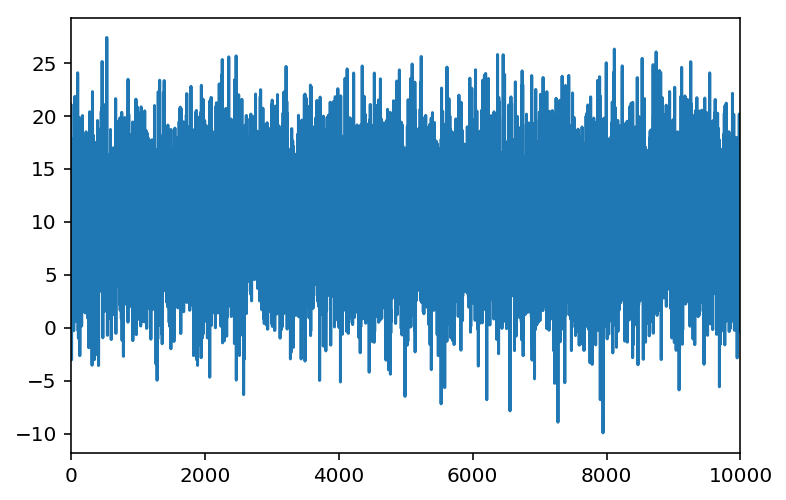

In [36]:
s.plot()

`s.plot()` draw the **histogram** of the distribution of `s`.

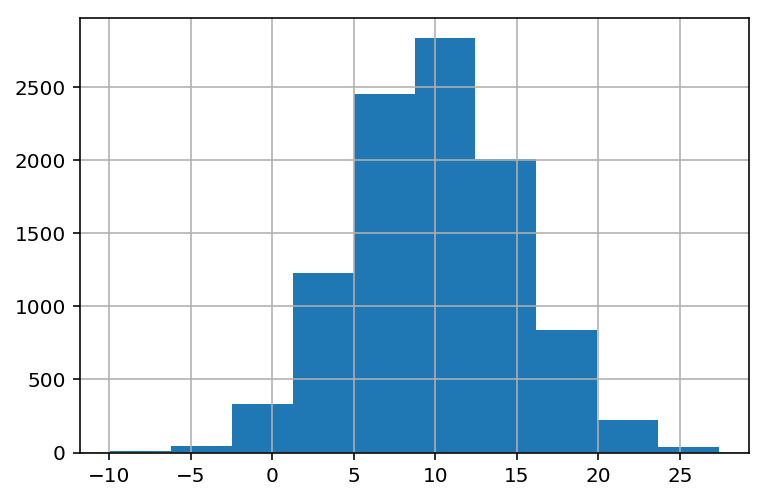

In [37]:
s.hist() ### try s.hist(bins=50)

#### Exercise
Create a `Series` whose indices are from January to December  
and the values are the number of days in each month.  
(Let's say February has 28 days.)

How many days from March 1st to September 30th, including the first day and the last day?

In [39]:
months = ['January', 'Feburuary', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']
days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
### your answer here


#### Exercise

Use the `Series` in the previous problem  
to generate a new `Series` that consists of only those months with 31 days.

In [40]:
### your answer here


#### Exercise
`Series.plot()` also depends on the index.  
Plot the exponential function and the log funcion in the following way.
1. Let `x` be an `ndarray` of `[0.5,1,1.5, ... ,10]`.
2. Let `y` be another `ndarray` of `[np.exp(0.5), np.exp(1), ... , np.exp(10)]`.
3. Create a `Series` `s1` whose values are `y` and whose indices are `x`.
4. Create a `Series` `s2` whose values are `x` and whose indices are `y`.
5. Do `s1.plot()` and `s2.plot()` in different cells.

In [ ]:
### your answer here

### s1 plots the exponential function
s1.plot()

In [ ]:
### your answer here

### s2 plots the logarithmic function
s2.plot()

#### Exercise
`pandas` has many nice features to process data.  
When `s` is a `Series`,  
check out the documentation of `s.value_counts()` and `s.idxmax()`.  

Use them to write a function `most_freq(l)`  
that takes a list whose elements are in 1,...,6  
and outputs the most frequent element.

For example, for the `a` defined below,  
`most_freq(a)` should be 5.

In [7]:
### Run this cell first to create the dice

import random

random.seed(10)  ### You can change a dice by changing the number here
my_secret = random.randint(1,6)
random.seed(None)

def roll_Jephian_dice():
    p_space = list(range(1,7)) + [my_secret] * 5
    return random.choice(p_space)

In [10]:
a = [roll_Jephian_dice() for k in range(60000)]

def most_freq(l):
    ### your answer here (which can be done in one line)
    

most_freq(a)